In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns

In [2]:
from dishpylib.pyanalysis import tee_plot

# get data

In [3]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [4]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [5]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how does genome robustness change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Mutations that are Deleterious'>

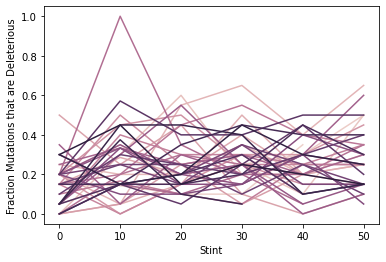

In [6]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Fraction Mutations that are Deleterious',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


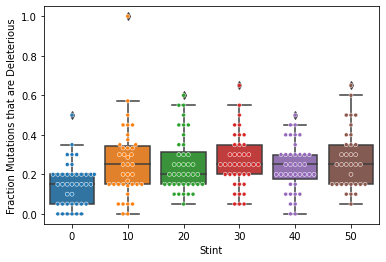

In [7]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fraction Mutations that are Deleterious',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=fraction-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Mutations that are Deleterious'>

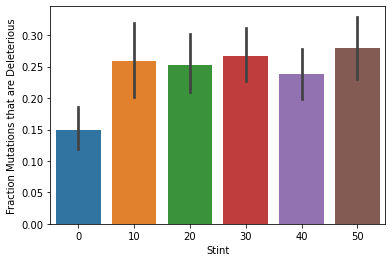

In [8]:
tee_plot(
    sns.barplot,
    data=df,
    x='Stint',
    y='Fraction Mutations that are Deleterious',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does fraction deleterious mutating mutants change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Mutating Mutations that are Deleterious'>

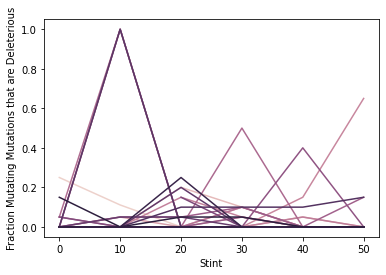

In [9]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Fraction Mutating Mutations that are Deleterious',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; y

outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


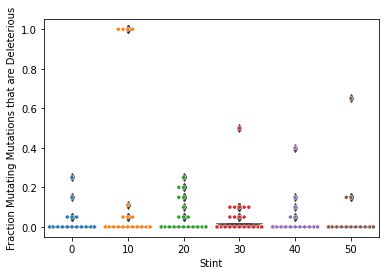

In [10]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fraction Mutating Mutations that are Deleterious',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=fraction-mutating-mutations-that-are-deleterious+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Mutating Mutations that are Deleterious'>

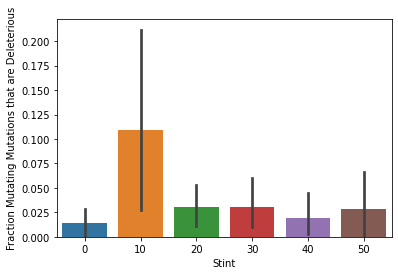

In [11]:
tee_plot(
    sns.barplot,
    data=df,
    x='Stint',
    y='Fraction Mutating Mutations that are Deleterious',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does fraction advantageous mutating mutants change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-mutating-mutations-that-are-advantageous+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-mutating-mutations-that-are-advantageous+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Mutating Mutations that are Advantageous'>

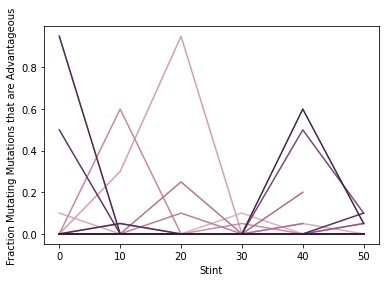

In [12]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Fraction Mutating Mutations that are Advantageous',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; y

outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-mutating-mutations-that-are-advantageous+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-mutating-mutations-that-are-advantageous+_dfdigest=581a93929506b064+ext=.png


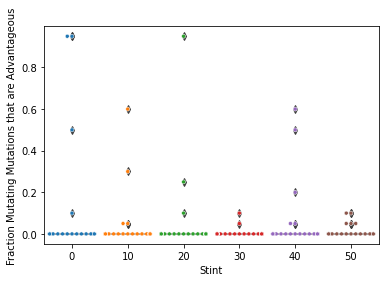

In [13]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fraction Mutating Mutations that are Advantageous',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=fraction-mutating-mutations-that-are-advantageous+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=fraction-mutating-mutations-that-are-advantageous+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Mutating Mutations that are Advantageous'>

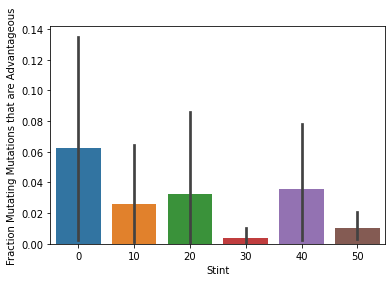

In [14]:
tee_plot(
    sns.barplot,
    data=df,
    x='Stint',
    y='Fraction Mutating Mutations that are Advantageous',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does median mutating mutant fitness change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Median Mutating Mutant Fitness Differential'>

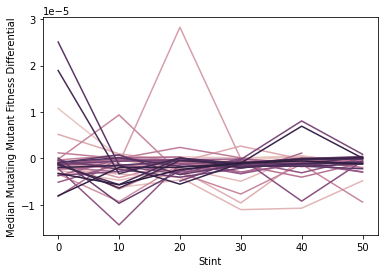

In [15]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Median Mutating Mutant Fitness Differential',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; y

outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


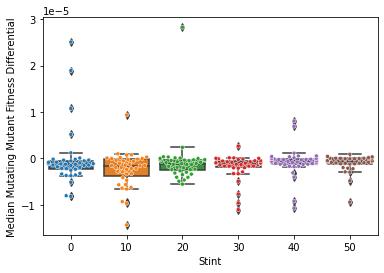

In [16]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Median Mutating Mutant Fitness Differential',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=barplot+x=stint+y=median-mutating-mutant-fitness-differential+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Median Mutating Mutant Fitness Differential'>

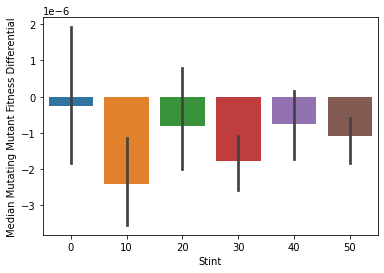

In [17]:
tee_plot(
    sns.barplot,
    data=df,
    x='Stint',
    y='Median Mutating Mutant Fitness Differential',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)